##**Assignment : 05**

##**Subject: Machine Learning Techniques**

###**Name:** Pranav Mishra

###**Roll no:** 2312res446

###**Experiment No: 1**

###**Title:** KNN (K-Nearest Neighbour)

###**Aim:** Implement of the KNN algorithm

###**Theory:** About KNN in 300 words

####Answer: K-Nearest Neighbors (KNN) is simple and powerful machine learning algorithm used for both classification and regressiion problem. It is a non- parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution.

####**Working of KNN:**

1. Choose a value for K: This will determines the number of neighbors considered when making any predictions.

2. Find Distance: For a given new data point, we have to calculate its distance to all training data points. We can use Euclidean or Manhattan distance for distance calculation.

3. Then finding K nearest neighbors: We have to identify the K closest training data points to the new data point based on the calculated distances.

4. Predictions: Both in Classification and Regression.


*   Classification: Assignning the new data point to the class that is most common among its KNN.
*   Regression: Calculating the average value of the target variable among its KNN and assign that value to the new data point.

####**Advantages of KNN**

1. Simple to understand and implement: This algorithm is intuitive and easy to grab it.

2. Versatile: It is flexible for both classification as well as regression problem.

3. Dimensionality data: It can handle large datasets with various features.

####**Disadvantages of KNN**

1. Computational complexity: It is slow for large datasets, in term of distances calculation.

2. Sensitive to the choice of K: Selecting the optimal value for k can be difficult and can significantly impact the model's performance.

3. Sensitive to noise and outliers: Outliers can have a disproportionate influence on ppredictions, especially when K is small.

####**Applications of KNN:**

1. Recommendation system

2. Image classification

3. Customer segmentation

4. Medical diagnosis


###**Platform: Google Colab**

###**Algorithm:** Steps---



*   Choose the value of K
*   Calculate distance (using Euclidean distance or Manhattan distance )
*   Find the K nearest neighbors

*   Predictions


###**Program :---**
 1. By using Library

2. By  Manually



In [1]:
# 1. By using Library
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Diabetes_RF.csv')
df.head(4)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO


In [3]:
df.columns = df.columns.str.strip()
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age (years)', 'Class variable'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()
df['Class variable'] = label_encoder.fit_transform(df['Class variable'])

In [6]:
# Split the dataset intoo features (X) and target(y)
X = df.drop('Class variable',axis=1)
y = df['Class variable']

In [7]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [9]:
# Initialize the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [10]:
# Train the model
knn.fit(X_train_,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test_)

In [12]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuarcy = accuracy_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

In [13]:
# Output the accuracy and classification report
print(f"Accuracy: {accuarcy * 100:.2f}%")
print(f"Classification Report:\n",classification_rep)

Accuracy: 70.78%
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



2. By Manually

In [22]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score

# Define the Euclidean distance function
def euclidean_distance(x1, x2):
    x1 = pd.to_numeric(x1, errors='coerce')
    x2 = pd.to_numeric(x2, errors='coerce')
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define the KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        X_test = X_test.apply(pd.to_numeric, errors='coerce')
        predictions = [self._predict(x) for x in X_test.values]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train.values]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Set up and run the KNN model
k = 3
knn = KNN(k=k)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"KNN model accuracy with k={k}: {accuracy*100:.2f}%")


KNN model accuracy with k=3: 64.94%


###**Experiment No. 2**

###**Title:** Naive Bayes Algorithm

###**Aim:** Implement of Naive Bayes Algorithm

###**Theory:** About Naive Bayes in 300 words

####Answer: Naive Bayes is a probabilistic machine learning algorithm based on Bayes' theorm, which assumes that features are independent given the class label.This assumption simplifies the calculation of probabilities, making it computationally efficient.

####Working of Naive Bayes
1. Probability Calculation:

*   Calculates the prior probability of each class.
*   Calculates the conditional probability of each feature given each class.

####Types of Naive Bayes:

*  Gaussian Naive Bayes: Assumes features are normally distributed.

*   Multinomial Naive Bayes: Suitable for count data, such as text classification.

*  Bernoulli Naive Bayes: For binary features.

####Advantages of Naive Bayes

*  Simple and efficient: It is easy to implement and computationally fast.

* Handles missing data: It can handle missing values.

*  Effective for large datasets: It can be effective on large datasets.

####Disadvantages of Naive Bayes:
* Independence assumption: The assumption of feature independence can be unrealistic in many real-world scenarios.

*  Sensitive to outliers: It can be sensitive to outliers in the data.

*  Limited expressiveness: May not capture complex relationships between features.

####Applications

* Text classification: Spam filtering, sentiment analysis.

*  Recommendation system: Recommending products or items.

* Medical diagnosis: Predicting diseases based on symptoms.

* Weather prediction: Forescasting weather conditions.

In summary, we can say that Naive Bayes is a useful algorithm for many machine learning task, especially when computational efficiency and simplicity are important. However, it's essential to be aware of its limitations, particularly the independence assumption, and consider other algorithms if the necessary.

###**Platform:** Google Colab

###**Algorithm:** Steps--

1. Calculate Prior Probabilities:

 *  Determine the probability of each class occurring independently.

 * Suppose, if a dataset has two classes, "positive" and "negative", calculate the proportion of instances belonging to each class.

2. Calculate Conditional Probabilities:

  * Calculate the probability of each feature occurring given a particular class.

  * For instance, if a feature is "color" with possible values "red","green",and "blue", calculate the probability of "red" given the "positive" class, the probability of "green" given the "positive" class, and so on.

3. Apply Bayes' Theorem

4. Predict the class

###**Program**






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("/content/Diabetes_RF.csv")
data.head(4)
#X = data.drop('Class',axis=1)
#y = data['Class']

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO


In [ ]:
data.columns = data.columns.str.strip()
data.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age (years)', 'Class variable'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data['Class variable'] = label_encoder.fit_transform(data['Class variable'])

In [ ]:
X = data.drop('Class variable',axis=1)
y = data['Class variable']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
# Create a Naive BAyes classifier
model = GaussianNB()

In [ ]:
# Train the model
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7662337662337663


In [ ]:
report = classification_report(y_test,y_pred)
print("CLassification Report:\n",report)

CLassification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



###By Manually

In [ ]:
import numpy as np

class naive_bayes:
  def fit(self,X,y):
    n_samples,n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    # calculate mean, var, and prior for each class
    self._mean = np.zeros((n_classes,n_features),dtype=np.float64)
    self._var = np.zeros((n_classes,n_features),dtype=np.float64)
    self._priors = np.zeros(n_classes,dtype=np.float64)

    for idx,c in enumerate(self._classes):
      X_c = X[y == c]
      self._mean[idx,:] = X_c.mean(axis=0) # Corrected: = instead of ==
      self._var[idx,:] = X_c.var(axis=0)
      self._priors[idx] = X_c.shape[0] / float(n_samples)

  def predict(self,X):
    y_pred = [self._predict(x) for x in X.values] # Convert X to NumPy array
    return np.array(y_pred)  # Corrected: y_pred instead of n_pred

  def _predict(self,x):
    posteriors = []

    # calculate posterior probability for each class
    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      posterior = np.sum(np.log(self._pdf(idx,x)))
      posterior = posterior + prior
      posteriors.append(posterior)

    # return class with the highest posterior
    return self._classes[np.argmax(posteriors)]

  def _pdf(self,class_idx,x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(-((x-mean)**2)/(2*var))
    denominator = np.sqrt(2*np.pi*var)
    return numerator / denominator

In [ ]:
# Testing
if __name__ == "__main__":

  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score # This line already imports accuracy_score
  from sklearn.preprocessing import LabelEncoder
  import pandas as pd
  df = pd.read_csv("/content/Diabetes_RF.csv")
  df.columns = df.columns.str.strip()
  df.columns
  label_encoder = LabelEncoder()
  df['Class variable'] = label_encoder.fit_transform(df['Class variable'])
  X = df.drop('Class variable',axis=1)
  y = df['Class variable']

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
  nb = naive_bayes()
  nb.fit(X_train,y_train)
  predictions = nb.predict(X_test)

  print("Naive Bayes classification accuracy", accuracy_score(y_test,predictions)) # Changed accuracy to accuracy_score

Naive Bayes classification accuracy 0.7662337662337663


###**Experiment No: 3**

###**Title: Decision Tree Algorithm**

###**Aim:** Implementation of Decision Tree Algorithm

###**Theory:** About Decision Tree Algorithm in 300 words

####Answer: Decision Tree are a popular machine learning algorithm often used for both classification and regression tasks. They are essentially flowcharts where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a decision or prediction.


####Working of Decision Tree algorithm

1. Root Node Selection: The algorithm starts by selecting the best attribute to use the root node. This attribute should
have the highest information gain or impurity reduction.

2. Splitting: The data is split based on the value of the root attribute, creating child nodes.

3. Recursive Process: The same process is repeated for each child node until all
data points belong to the same class (for classification ) or a stopping criterion is met (Ex. maximum depth).

####Advantage of Decision Trees:

* Interpretability: Decision trees are easy to inderstand and visualize, making them popular in applications where explainability is important.

* Non-parametric: They don't make assumptions about the underlying data distribution.

* Handle both numerical and categorical data: Decision trees can handle both types of data without requiring preprocessing.

* Robust to outliers: Outliers may have a limited impact on the overall structure of the tree.

####Disadvantages of Decision Trees:

* Overfitting: Decision trees can easily overfit to the training data, especially with deep trees.

* Sensitive to small changes: Small changes in the data can lead to significant changes in the tree structure.

* Inconsistent predictions: Decision trees can produce inconsistent predictions for similar input instances
due to way they split the data.

####Common Decision Tree Algorithms:

* ID3 (Iterative Dichotomiser 3): Uses information gain to select attributes.

* C4.5: An extension of ID3 that handles missing values and continuous attributes.

* CART (Classification and Regression Trees ): Uses Gini impurity or entropy for attribute selection.

####Applications:

Decision trees are widely used in various fields, including:

* Medical diagnosis: Prediction diseases based on symptoms.

* Customer churn prediction: Identifying customers likely to leave a company.

* Fraud dectection: Detecting fraudulent transactions.

* Risk assessment: Evaluating risk in financial or insurance applications.

* Recommendation systems: Suggesting products or services to users.

In summary, Decision Trees are a versatile and interpretable machine learning algorithm that can be applied to a wide range of problems. However, it's important to be aware of their limitations and consider techniques like pruning or ensemble methods to improve their performance.

###**Platform:** Google Colab

###**Algorithm:** Steps--

1. Choose a Root Node:
 * Select the attribute that best splits the dataset into homogeneous subsets. This is often measured using metrics like information gain, gini impurity, or entropy.

2. Create Child Nodes:
 * Based on the chosen attribute, create child nodes for each possible value of that attribute.

3. Recursively Build the tree:
 * Repeating the 1 and 2 steps for each child node until a stopping criterion is met.
 Stopping criterion includes:-
 * Maximum depth
 * Minimum number of samples
 * Leaf purity

4. Assign Class Labels to Leaf Nodes:
 * Assign the most frequent class label to eah leaf node.

###**Program**   

In [ ]:
# By using library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Diabetes_RF.csv")
df.head(4)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy:",str(accuracy)+'%')

Accuracy: 75.32467532467533%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.82      0.79      0.80        99
         YES       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: NO
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |--- class: NO
|   |   |--- feature_5 >  30.95
|   |   |   |--- feature_2 <= 37.00
|   |   |   |   |--- class: YES
|   |   |   |--- feature_2 >  37.00
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_3 <= 8.50
|   |   |   |   |   |   |--- feature_1 <= 109.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |--- feature_1 >  109.50
|   |   |   |   |   |   |   |--- feature_5 <= 32.45
|   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |   |--- feature_5 >  32.45
|   |   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- feature_3 >  8.50
|   |   |   |   |   |   |--- feature_5 <= 31.80
|   |   |   |   

[Text(0.47834201388888886, 0.9705882352941176, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.18307291666666667, 0.9117647058823529, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.3307074652777778, 0.9411764705882353, 'True  '),
 Text(0.06666666666666667, 0.8529411764705882, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.022222222222222223, 0.7941176470588235, 'x[6] <= 0.672\nentropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.011111111111111112, 0.7352941176470589, 'entropy = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.03333333333333333, 0.7352941176470589, 'x[6] <= 0.686\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.022222222222222223, 0.6764705882352942, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.044444444444444446, 0.6764705882352942, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.1111111111111111, 0.7941176470588235, 'x[2] <= 37.0\nentropy = 0.64

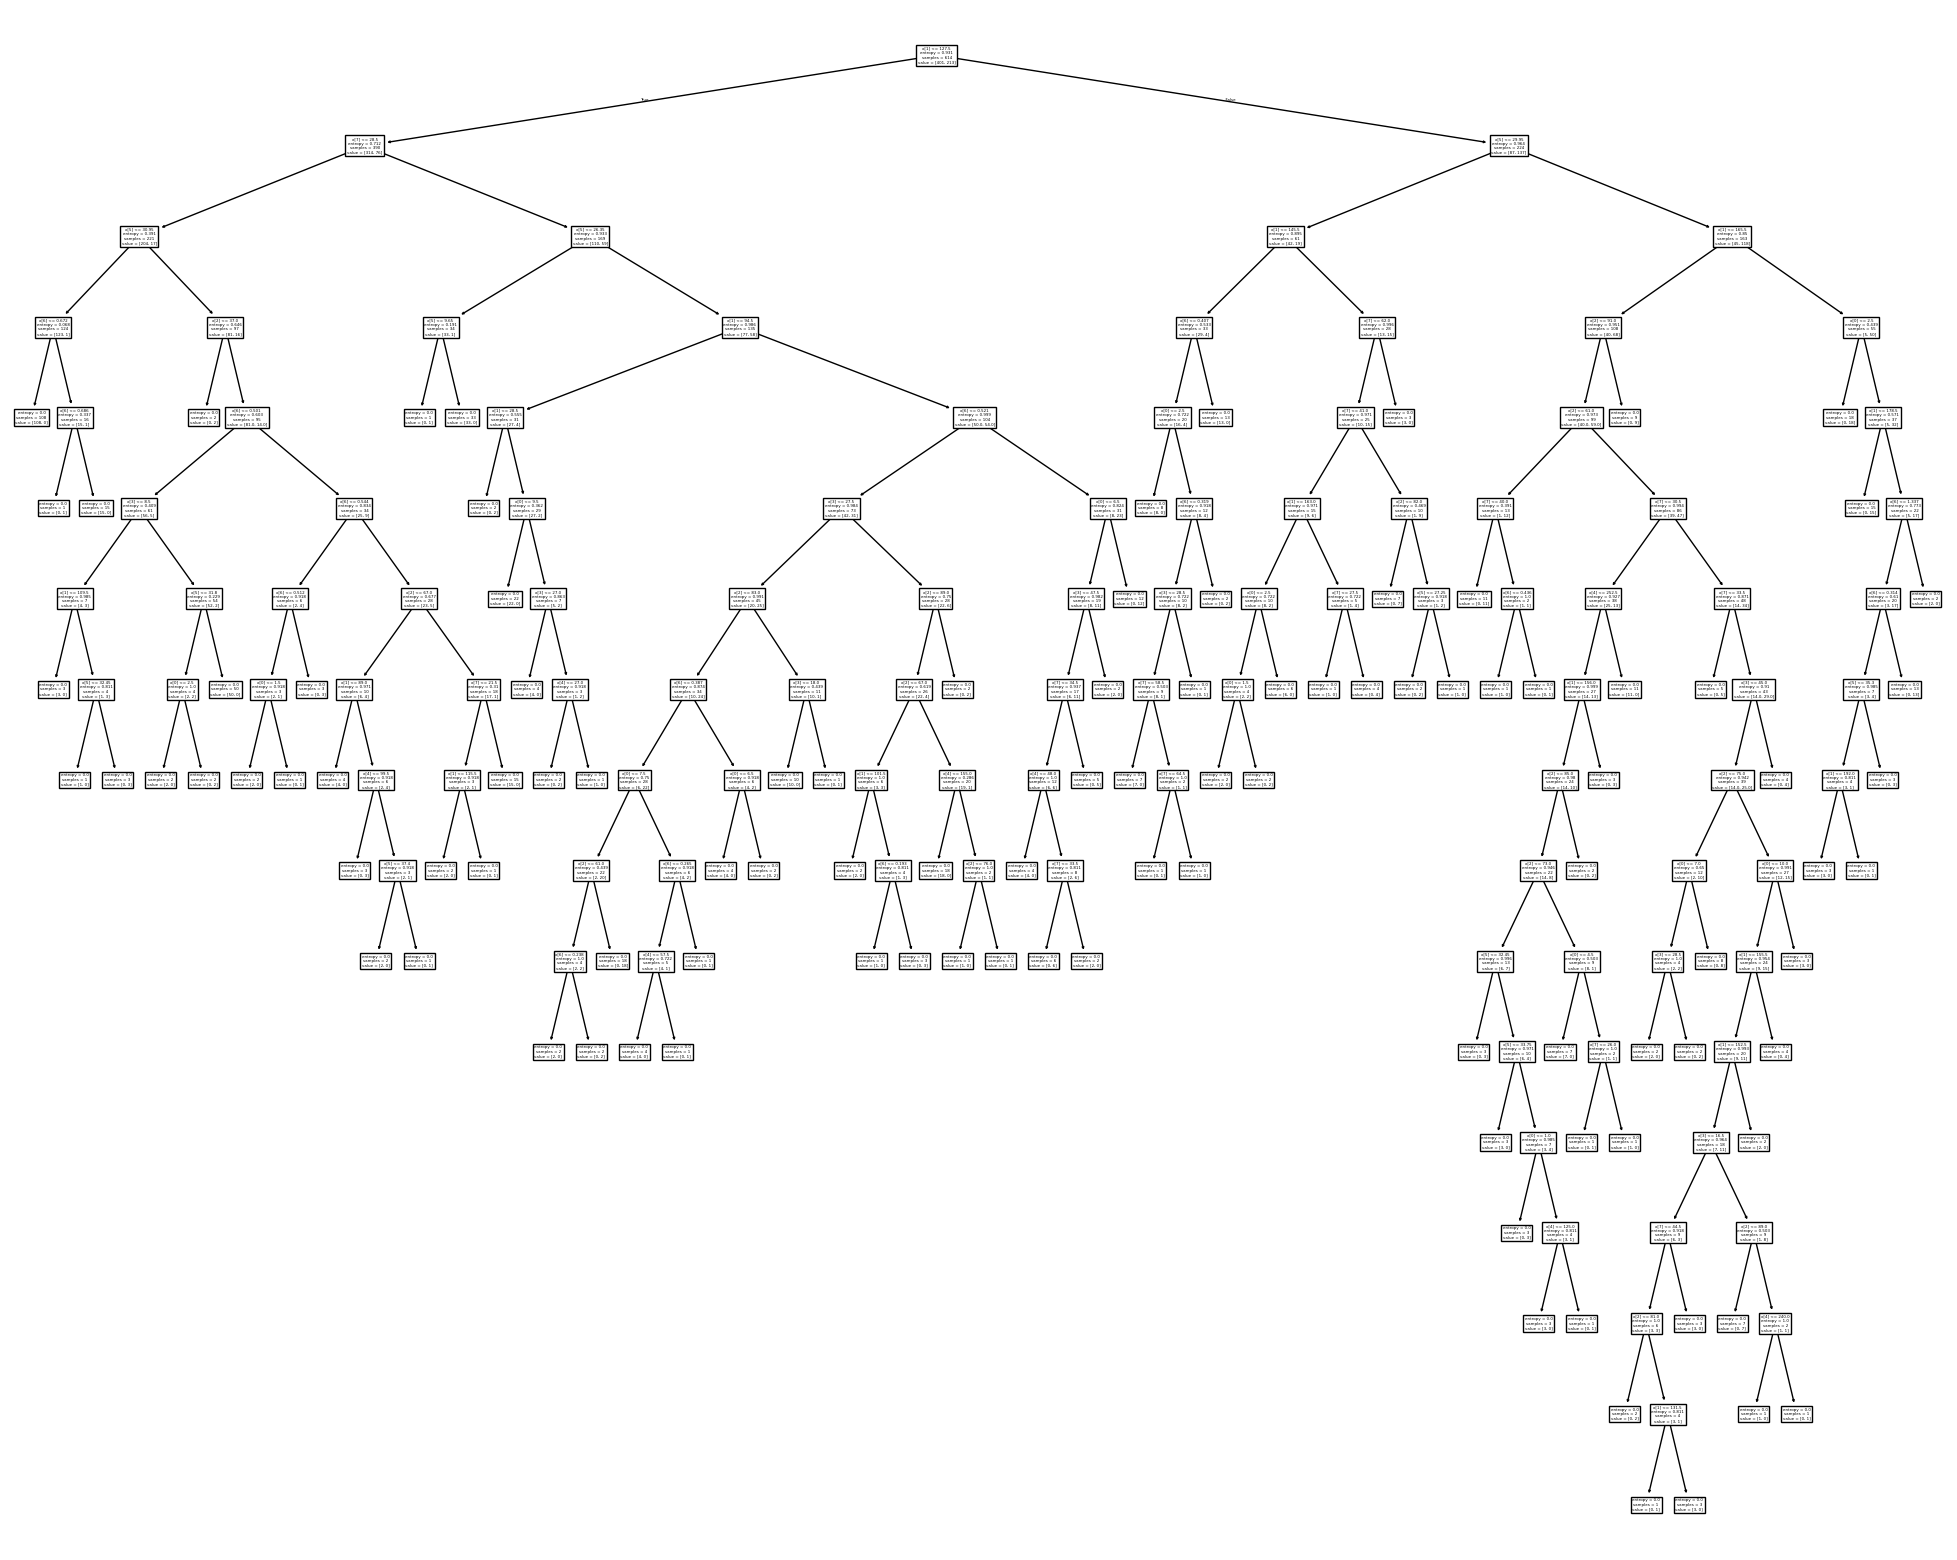

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)

###**Experiment No: 4**
###**Title: Linear Regression Algorithm**
###**Aim: Implementation of Linear Regression Algorithm**
###**Theory:** About Linear Regression Algorithm in 300 words

####Answer: Linear Regression is a statistical method used to model the relationship between a dependent variable (also Known as the outcome variable) and one or more independent variable variables (also Known as predictors). It assumes that the relationship between that variables is linear, meaning that the dependent variable can be predicted from the independent variable using a linear equation.

**The Linear Equation**

y = b0 + b1*x1 + b2*x2 + ....+ bn*xn

y = dependent variable

b0 = intercept

b1,b2,...,bn = coefficent

x1,x2,...,xn = independent variables

**Types of Linear Regression**

1. **Simple Linear Regression:** This involves only one independen variable.

2. **Multiple Linear Regression:** This involves more than one independent variable.

####**Working of Linear Regression:**
* Data Collection: Gather relevant data for the dependent and independent variables.

* Model Training: Use statistical methods to estimate the coeffients (b0,b1,b2,...) that best fit the data.This is often done using a techinque called least squares, which minimizes the sum of the squared difference between the predicted values and the actual values.

* Making Predictions: Once the model is
trained, it can be used to predict the value o the dependent variable for new data points.

**Applications of Linear Regression**

Linear regression has a wide range of applications in various fields, including:
* Social Sciences: Predicting exam scores based on study hrs.
* Economics: Forecasting stock prices or GDP growth.
* Engineering: Modeling the relationship between and pressure
* Healthcare: Predicting patient outcomes based on medical data

###**Platform: Google Colab**
###**Algorithm:** Steps--

The most common algorithm for linear regression is the Least Squares Method. This method aims to find the line (or hyperplane in the case of multiple variables) that minimizes the su of the squared difference between the predicted values and the actual values.

**Steps--**
1. Data Preparation:
 * Collect the data for the dependent and independent variables.
 * Ensure that the data is clean and free from errors.
 * Consider scaling or normalization if necessary.

2.  Model Formulation
3. Cost Function

  MSE = (1/n) * E(yi - y^i)^2

  where,
  
   n = no. of data points
  
   yi = actual value

   y^i = predicted value

4. Optimization
 * Use an optimization algorithm to minimize te cost function. The most common mehod is gradient descent.

 b_new = b_old - learning_rate* (df MSE / db )

5. Model Evaluation

###**Program**


In [23]:
# By using Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/car_data.csv")
df.head(4)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1


In [24]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

<ipython-input-24-3f3517738259>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})


In [25]:
df.head(4)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1


Text(0, 0.5, 'Purchased')

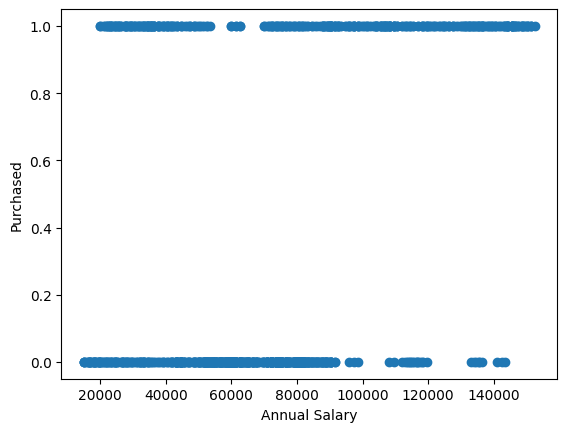

In [26]:
plt.scatter(df['AnnualSalary'],df['Purchased'])
plt.xlabel('Annual Salary')
plt.ylabel('Purchased')

In [27]:
X = df.iloc[:,3:4]
y = df.iloc[:,-1]

In [28]:
y

,Purchased
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
X_test

,AnnualSalary
521,73500
737,135500
740,59500
660,42500
411,135500
...,...
408,80000
332,19500
208,32000
613,28500


In [32]:
regressor.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.39445908])

Text(0, 0.5, 'Purchased')

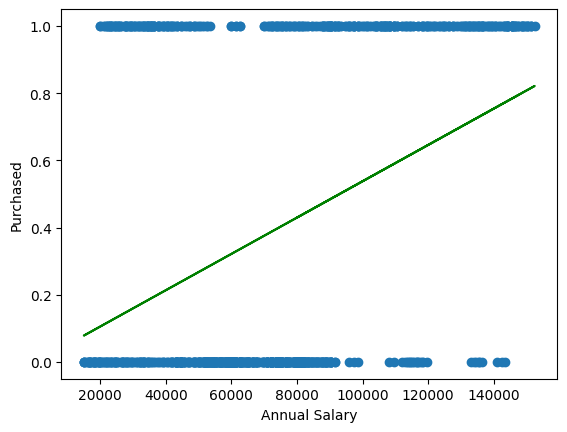

In [33]:
plt.scatter(df['AnnualSalary'],df['Purchased'])
plt.plot(X_train,regressor.predict(X_train),color='green')
plt.xlabel('Annual Salary')
plt.ylabel('Purchased')

In [34]:
m = regressor.coef_
b = regressor.intercept_

In [35]:
m*73500+b

array([0.39445908])

In [36]:
m*100+b

array([-0.00222176])

In [ ]:
# By manually
class LR_1:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):
    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean())*(y_train[i]-y_train.mean()))
      den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)

  def predict(self,X_test):
    print(X_test)

    return self.m * X_test + self.b



In [ ]:
first_element_of_X_train = X_train.iloc[0]

In [ ]:
regressor = LR_1()
regressor.fit(X_train.values,y_train.values)

[5.40437115e-06]
[-0.0027622]


In [ ]:
X_train.shape[0]

800

###**Experiment No: 5**
###**Title: Multiple Regression Algorithm**
###**Aim: Implementation of Multiple Regression Algorithm**
###**Theory: About Multiple Regression Algorithm in 300 words**

####Answer: Multiple regression is a statistical method used in machine learning to model the relationship between a dependent variable and two or more independent variables. It's a powerful tool for predicting outcomes based on multiple factors.

####Working of multiple regression:

1. Data Collection: Gather a dataset with multiple features (independent variables) and a target variable (dependent variable).

2. Model Building: A linear equation is constructed to represent the relationship between the variables. The equation includes coefficients(weights) for each independent variable and an intercept term.

3. Coefficient Estimation: The model's coefficent are determined using a technique like least squares, which aims to minimize the sum of squared errors between the predicted values and the actual values.

4. Prediction: Once the model is trained, it can be used to predict the target variable for new data points by plugging in the values of the independent variables into the equation.

####Applications:
* Sales forecasting: Predicting future sales based on factors like marketing spend, economic indicators, and competitor activity.

* Real estate pricing: Estimating property values based on features such as square footage, number of bedrooms, and location.

* Risk assessment: Assessing the likelihood of an event occurring (ex. loan default) based on various risk factors.

* Customer churn prediction: Identifying customers who are likely to stop using a product or services.

####Advantages:
1. Interpretability: The coefficients in the regression equation provide insights into the importance of each independent variable in predicting the target variable.

2. Efficiency: Multiple regression is computationally efficient, making it suitable for large datasets.

3. Flexibility: It can handle both continuous and categorical independent variables.

####Limitations:
* Linearity assumption
* Multicollinearity
* Outliers

###**Platform: Google Colab**
###**Algorithm:** Steps--

* Data Collection
* Feature Selection
* Data Preprocessing
* Model Building
* Coefficient Estimation
* Model Training
* Model Evaluation
* Prediction

###**Program**

In [ ]:
# By using Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/Diabetes_RF.csv")
df.head(4)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age (years)', 'Class variable'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class variable'] = label_encoder.fit_transform(df['Class variable'])
X = df.drop('Class variable',axis=1)
y = df['Class variable']

In [ ]:
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Class variable
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df,
                    x='Number of times pregnant',  # Changed from 'Pregnancies'
                    y='Plasma glucose concentration',  # Changed from 'Glucose'
                    z='Diastolic blood pressure',  # Changed from 'BloodPressure'
                    color='Class variable')
fig.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X = df.drop(columns=['Plasma glucose concentration'])
y = df['Plasma glucose concentration']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rmse = mean_squared_error(y_test,y_pred,squared=False)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [ ]:
print(f"RMSE: {rmse}")
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R2 Score: {r2}")

RMSE: 26.545738366329477
MSE:704.6762254136167
MAE:20.60737887687077
R2 Score: 0.2997416970153667


####By Manually

In [ ]:
# By manually
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Diabetes_RF.csv")
df.head(4)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class variable'] = label_encoder.fit_transform(df['Class variable'])
X = df.drop('Class variable',axis=1)
y = df['Class variable']

In [ ]:
X = df.drop(columns=['Plasma glucose concentration'])
y = df['Plasma glucose concentration']

In [ ]:
# Add a column of ones for the bias (intercept term)
X = np.c_[np.ones(X.shape[0]),X]

In [ ]:
X = np.array(X)
y = np.array(y)
# normal equation to compute coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
# Making prediction
y_pred = X @ beta

In [ ]:
mse = np.mean((y-y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y-y_pred)**2))/np.sum((y-np.mean(y))**2)

In [ ]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score:{rmse}")

MSE: 669.4461347115224
RMSE: 25.873657157648246
R2 Score:25.873657157648246


###**Experiment No: 6**
###**Title: Logistic Regression Algorithm**
###**Aim: Implementation of Logistic Regression Algorithm**
###**Theory: About Logistic Regression Algorithm in 300 words**
####Answer: Logistic regression is a statistical method used in machine learning to predict the probability of an event occurring. It's a popular classification algorithm that is particularly effective when the dependent variable is binary (ex. 0 or 1, yes or no).

####**Working of Logistic regression:**
1. Data Preparation: Collect a dataset with multiple features (independent variables) and a binary target variable.

2. Model Building: A logistic function (also known as sigmoid function) is used to map the linear combination of the independent variables to a probability between 0 and 1.

3. Coefficient Estimation: The coefficients in the logistic function are estimated using techinques like maximum likelihood estimation, which aims to maximize the likelihood of observing the given data.

4. Prediction: To make predictions, input new data into the model, calculate the probability using the logistic function, and classify the instance based on a threshold (ex. if the probability is > 0.5, classifiy it as 1 ).

####**Applications:**
* Customer churn prediction: Identifying customers who are likely to stop using a product or service.
* Fraud detection: Detecting fraudulent transactions or activities.
* Email spam filtering: Classifying emails as spam or not spam.
* Medical diagnosis: Predicting the presence or absence of a disease based on patient symptoms and test results.

####**Advantages:**
* Interpretability: The coefficients in the logistic regression model can be interpreted to understand the importance of each feature in predicting the outcome.

* Efficiency: Logistic regression is computationally efficient, making it suitable for large datasets.

* Probability estimation: It provides a probability score, which can be useful for decision-making.

####**Limitations**
* Linearity assumption
* Overfitting
* Multicollinearity

###**Platform: Google Colab**
###**Algorithm:** Steps--
* Data Preparation
* Model Building
* Loss Function
* Parameter Update
* Model Evaluation

###**Program**


In [ ]:
# By library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
data = pd.read_csv("/content/drug200.csv")
data.head(4)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [ ]:
data_encoded = pd.get_dummies(data,drop_first=True)

In [ ]:
drug_columns = [col for col in data_encoded.columns if col.startswith('Drug_')]

In [ ]:
X = data_encoded.drop(columns= drug_columns)
y = data_encoded[drug_columns[0]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99        37
        True       1.00      0.67      0.80         3

    accuracy                           0.97        40
   macro avg       0.99      0.83      0.89        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.975


####By Manually

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drug200.csv")

In [ ]:
data_encoded = pd.get_dummies(data,drop_first=True)

In [ ]:
drug_columns = [col for col in data_encoded.columns if col.startswith('Drug_')]

In [ ]:
X = data_encoded.drop(columns= drug_columns)
y = data_encoded[drug_columns[0]]

In [ ]:
# Sigmoid function
def sigmoid(z):


  z = np.asarray(z,dtype=np.float64)
  return 1/(1+np.exp(-z))

def cost_compute(X,y,weights,bias):
  m = len(y)
  z = np.dot(X,weights) + bias
  h = sigmoid(z)
  cost = (-1/m) * np.sum(y*np.log(h)+(1-y)*np.log(1-h))
  return cost

def gradient_descent(X,y,weights,bias,learning_rate,iterations):
  m = len(y)
  cost_history = []
  X = X.astype(np.float64)

  for i in range(iterations):
    z = np.dot(X,weights) + bias
    h = sigmoid(z)

    #Calculating gradients
    d_w = (1/m)*np.dot(X.T,(h-y))
    d_b = (1/m)*np.sum(h-y)

    weights -= learning_rate * d_w
    bias -= learning_rate * d_b

    cost = cost_compute(X,y,weights,bias)
    cost_history.append(cost)

    if i % 100 == 0:
      print(f"Cost after iteration {i}:{cost}")
  return weights,bias,cost_history

In [ ]:
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.01
iterations = 1000

weights,bias,cost_history = gradient_descent(X,y,weights,bias,learning_rate,iterations)

Cost after iteration 0:0.9264282043524277
Cost after iteration 100:0.2387616071397821
Cost after iteration 200:0.22982992472081087
Cost after iteration 300:0.22544554525391103
Cost after iteration 400:0.22264642797785883
Cost after iteration 500:0.22050622892555027
Cost after iteration 600:0.2186387018243827
Cost after iteration 700:0.21688712958234532
Cost after iteration 800:0.2151911190485144
Cost after iteration 900:0.2135280111411108


In [ ]:
def predict(X,weights,bias):
  z = np.dot(X,weights) + bias
  probabilities = sigmoid(z)
  predictions = [1 if p>=0.5 else 0 for p in probabilities]
  return predictions

In [ ]:
y_pred = predict(X,weights,bias)
accuracy = np.mean(y_pred == y)*100
print(f'Accuracy:{accuracy:.2f}%')

Accuracy:91.50%


###**Experiment No: 7**
###**Title: Polynomial Regression Algorithm**
###**Aim: Implementation of Polynomial Regression Algorithm**
###**Theory: About Polynomial Regression Algorithm in 300 words**

####Answer: Polynomial regression is a statistical model used to fit a nolinear relationship between a dependent variable and or more independent vaiables. Unlike linear regression, which assumes a linear relationship, ploynomial regression allows for more complex curves to be modeled.

####**Working of it:**
In polynomial regression, the model is represented by a polynomial equation:

y = a0 + a1*x + a2*x^2 + ... + an*x^n

where,

y = dependent variable

x = independent variable

a0 , a1, ..., an = coefficients to be determined

n = degree of the polynomial

The coefficient are determined using a techinque called least squares, which minimizes the sum of the squared difference between the predicted and actual values.

####**Advantages**
* Flexibility: It can model complex relationships that llinear regression cannot.
* Accuracy: In many cases, it can provided more accurate predictions than linear regression.
* Simplicity: The underlying equation is relatively straightforward.

####**Disadvantages**
* Overfitting: If the degree of the polynomial is too high, it can overfit the data, leading to poor generalization performance.

* Interpretation: The coefficients in the polynomial equation can be difficult to interpret, especially for higher-degree polynomials.

####**Applications**
* Predicitng stock prices
* Modeling the relationship between temperature and ice cream sales
* Analyzing the effect of advertising spending on sales
* Predicting the lifespan of a machine based on its usage

###**Platform: Google Colab**
###**Algorithm: Steps--**
* Choose the degree of the polynomial
* Construct the design matrix
* Calculate the coefficients
* Evaluate the model

###**Program**

####By using library

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/Ice_cream selling data.csv")
df.head(4)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845


In [ ]:
print('Shape:',df.shape)
df.info()

Shape: (49, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [ ]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [ ]:
#Splitting data into X and Y
X = df['Temperature (°C)']
y = df['Ice Cream Sales (units)']

In [ ]:
print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)

Shape of X =  (49,)
Shape of y =  (49,)


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

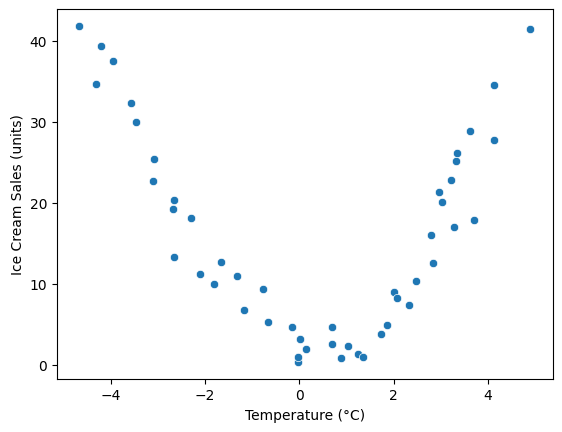

In [ ]:
sns.scatterplot(data=df,x = X,y=y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [ ]:
#reshape it
if isinstance(X_train,pd.Series):
  X_train = X_train.to_frame()
  X_test = X_test.to_frame()

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
X_train_poly.shape

(39, 3)

In [ ]:
#initializing
model = LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
acc = model.score(X_test_poly,y_test)
print(f'Accuracy of Model:{acc:.2f}')

Accuracy of Model:0.94


In [ ]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MSE: 12.962461975943075
RMSE: 3.600341924865342
R2 Score: 0.9434211617529296


In [ ]:
reshape_X = X.values.reshape(-1,1)

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

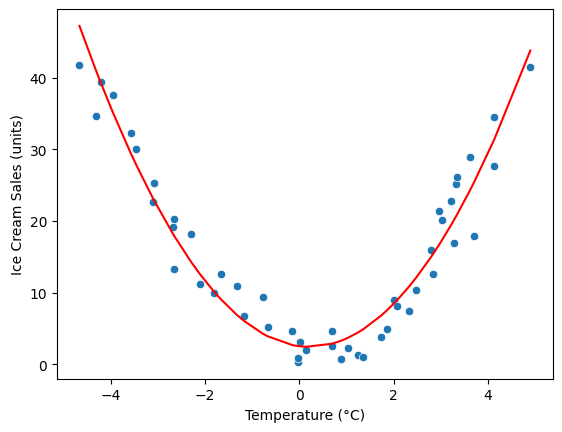

In [ ]:
plt.plot(reshape_X,model.predict(poly_reg.fit_transform(reshape_X)),color='red')
sns.scatterplot(data=df,x=X,y=y)

####By manually

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def polynomial_features(X,degree):
  X_poly = np.ones((X.shape[0],degree + 1))
  for i in range(1,degree+1):
    X_poly[:,i] = X**i
  return X_poly

In [ ]:
def fit_poly_reg(X,y,degree):
  X_poly = polynomial_features(X,degree)
  # normal equ: theta = (X.T*X)^(-1)*X.T*y
  theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
  return theta

In [ ]:
def predict(X,theta,degree):
  X_poly = polynomial_features(X,degree)
  y_pred = X_poly.dot(theta)
  return y_pred

In [ ]:
X = df['Temperature (°C)'].values
y = df['Ice Cream Sales (units)'].values

In [ ]:
degree = 3

In [ ]:
theta = fit_poly_reg(X,y,degree)

In [ ]:
#prediction
y_pred = predict(X,theta,degree)

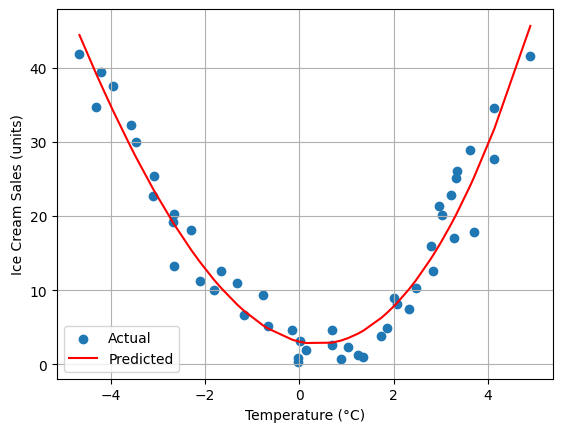

In [ ]:
plt.scatter(X,y,label='Actual')
plt.plot(X,y_pred,color='red',label='Predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.show()

###**Experiment No: 8**
###**Title: K-Means Clustering Algorithm**
###**Aim: Implementation of Polynomial Regression Algorithm**
###**Theory: About K-Means Clustering Algorithm in 300 words**

####Answer: K-Means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K clusters. The goal is to group data points together such that points within a cluster are similar to each other, while points in different clusters are dissimilar.

####**Working of K-Means Clustering**

* Initialize centroids: Randomly select K data points as initial centroids.
* Assign data points to clusters: Assign each data point to the nearest centroid based on euclidean distance.
* Update centroids: Calculate the new centroids as the mean of al data points assigned to that cluster.
* Repeat steps 2 and 3: Iterate until there are no changes in cluster assignments or a maximum number of iterations is reached.

####**Advantages of K-Means**
* Simple and efficient: K-Means is relatively easy to understand and implement.
* Scalable: It can handle large datasets efficiently.
* Versatile: Can be used for various applications, such as customer segmentations, image compression, and anomaly detection.

####**Disadvantages of K-Means**
* Sensitive to initialization: The choice of initial centroids can significantly affect the final clustering results.
* Assumes spherical clusters: K-Means assumes that clusters are spherical and of similar size, which may not always bee the case in real-world data.
* Prone to local optima: The  algorithm may get stuck in a local minimum, preventing it frim finding tge global optimum.

####**Applications of K-Means**
* Customer segmentation
* Image compression
* Anomaly detection
* Recommendation systems

###**Platform: Google Colab**
###**Algorithm: Steps--**
* Initialize centroids
* Assign data points to clusters
* Update centroids
* Repeat step 2 and 3

###**Program**

####By library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/student_clustering.csv')
df.head(4)

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97


Text(0, 0.5, 'IQ')

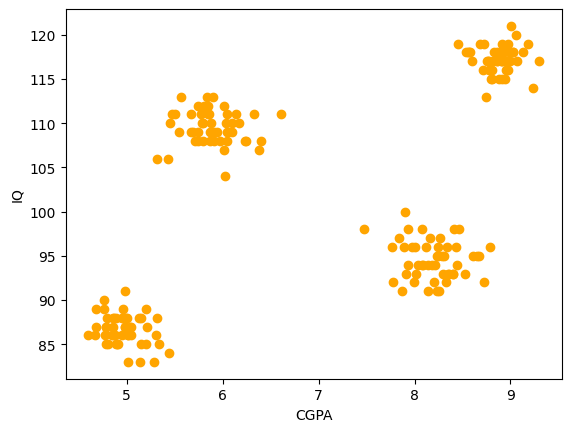

In [ ]:
plt.scatter(df['cgpa'],df['iq'],color='orange')
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [ ]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 530.4298616986187,
 477.15853038548767,
 317.8537932159606,
 249.93816785875316,
 205.59189783169822,
 248.94254158956332]

Text(0, 0.5, 'WCSS')

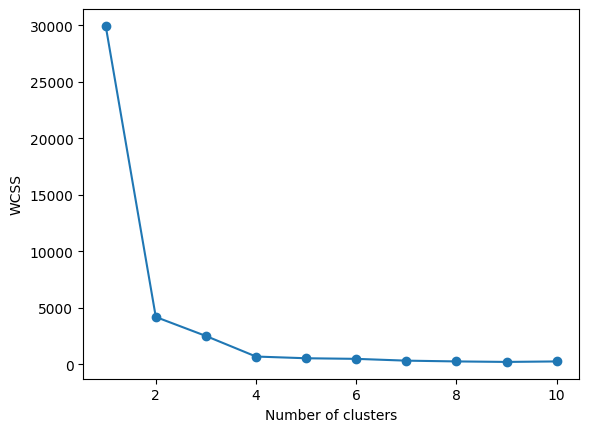

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [ ]:
y_means

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

In [ ]:
X[y_means == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

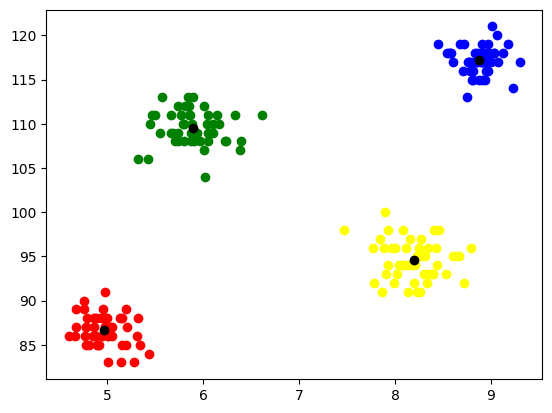

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color = 'blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color = 'green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')

####By manually

In [ ]:
import random
import numpy as np

In [ ]:
import random
import numpy as np

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)  # Calling assign_clusters
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self, X): # This function is now part of the KMeans class
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group): # This function is now part of the KMeans class
        new_centroids = []

        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/student_clustering.csv')
X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

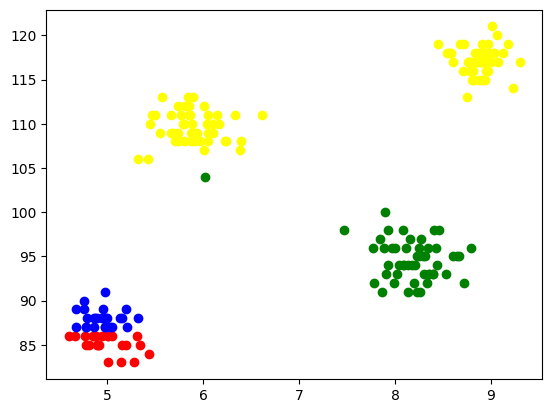

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

###**Experiment No: 9**
###**Title: PCA Algorithm**
###**Aim: Implementation of PCA Algorithm**
###**Theory: About PCA Algorithm in 300 words**

####Answer: PCA(Principal Component analysis) is a statistical technique used to transform high-dimensional data into lower-dimensional form while retaining as much information as possible. It's a popular method in machine learning for dimensionality reduction, data visualization, and feature extraction.

####**Working of PCA:**

* Standardization: The data is first standardized to ensure all features have a mean of 0 and a standard deviation of 1. This helps prevent features with larger scales from dominating the analysis.

* Covariance Matrix Calculation: The covariance matrix is computed, which measures the relationships between pairs of features.

* Eigenvalue Decomposition: The covariance matrix is decomposed into its eigenvalues and eigenvectors. The eigenvalues represent the variance explained by each principal component, while the eigenvectors define the direction of the principal components.

* Principal Component Selection: The principal components are ranked based on their eigenvalues, with the components corresponding to the largest eigenvalues capturing the most variance in the data. The desired number of principal components is selected to achieve the desired dimensionality reduction.

* Projection: The original data is projected onto the subspace defined by the selected principal components. This transorms the data into a lower-dimensional representation.

####**Advantages**

* Dimensionality Reduction: PCA can significantly reduce the number of features in a dataset without losing too much information, which can improve computational efficiency and model performance.

* Data Visualization: PCA can help visualiz high dimensional data by projecting it onto a 2D or 3D space, making it easier to understand relationship and patterns.

* Feature Extraction: PCA can extract meaningful features from the data that captures the most important variations. These features can be used as input to other machine learning algorithms.

* Noise Reduction: PCA can help reduce the impact of noise in the data by focusing on the principal components that capture the most signal.

####**Limitations of PCA**

* Loss of Interpretability: PCA can make it difficult to interpret the meaning of the principal components, as they are linear combinations of the original features.

* Assumption of Linearity: PCA assumes that the data is linearly related, which may not be true in all cases.

* Sensitivity to Outliers: PCA can be sensitive to outliers, which can influence the principal components.

###**Applications**

* Image Processing: PCA is used for image compression and denoising.

* Natural Language Processing: PCA is used for topic modeling and document representation.

* Finance: PCA is used for portfolio optimization and risk analysis.

* Bioinformatics: PCA is used for gene expression analysis and drug discovery.

###**Platform: Google Colab**
###**Algorithm: Steps--**

1. Standardization:
  *  Center the data
  * Scale the data

2. Compute the Covariance Matrix  

3. Eigenvalue Decomposition

4. Sort Eigenvalues and Corresponding Eigenvectors

5. Select Principal Components

6. Project Data onto Principal Components

###**Program**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/Cancer_data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.shape)
df.info()

(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
# Principal Component Analysis
df_ = df.drop(['diagnosis'],axis=1)

In [ ]:
df_ = StandardScaler().fit_transform(df_)

In [ ]:
pca = PCA()
pca.fit = pca.fit_transform(df_)

In [ ]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

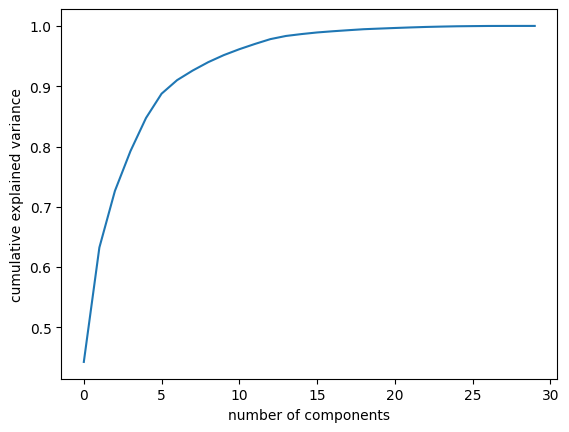

In [ ]:
#Optimum no. of components
pca = PCA().fit(df_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
var_1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var_1)

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15 96.13 97.
 97.8  98.32 98.63 98.9  99.1  99.28 99.44 99.54 99.64 99.73 99.81 99.87
 99.92 99.95 99.97 99.98 99.98 99.98]


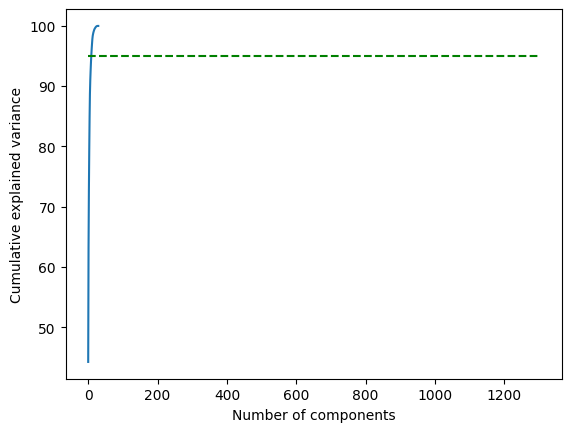

In [ ]:
plt.plot(var_1)
plt.hlines(95,0,1300,colors = 'green',linestyles = 'dashed')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
y = df['diagnosis']
X = df.drop(['diagnosis'],axis=1)

In [ ]:
def create_pca(X,y):
  X = StandardScaler().fit_transform(X)
  pca = PCA(n_components=2)
  pca_fit = pca.fit_transform(X)
  pca_df = pd.DataFrame(data=pca_fit,columns=['PC1','PC2'])
  final_df = pd.concat([pca_df,pd.DataFrame(data=y)],axis=1)
  return final_df

pca_df = create_pca(X,y)

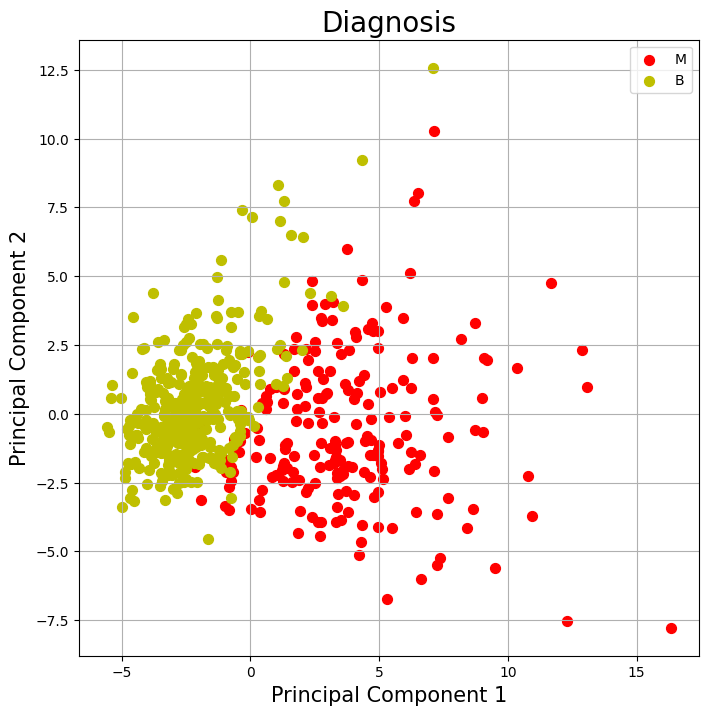

In [ ]:
import random
def pca_plot(dataframe,target):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('Principal Component 1',fontsize=15)
  ax.set_ylabel('Principal Component 2',fontsize=15)
  ax.set_title(f'{target.capitalize()}',fontsize=20)

  targets = list(dataframe[target].unique())
  colors = random.sample(['r','g','b','y'],len(targets))
  for target_value, color in zip(targets,colors):
    indicesToKeep = dataframe[target] == target_value
    ax.scatter(dataframe.loc[indicesToKeep,'PC1'],dataframe.loc[indicesToKeep,'PC2'],c=color,s=50)
  ax.legend(targets)
  ax.grid()
  plt.show()

pca_plot(pca_df,"diagnosis")

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Cancer_data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
X = df.select_dtypes(include=[np.number])
X_meaned  = X - np.mean(X,axis=0)

In [ ]:
cov_matrix = np.cov(X_meaned,rowvar=False)

In [ ]:
eigen_values,eigen_vectors = np.linalg.eigh(cov_matrix)

In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
n_components = 2
eigenvectors_subset = sorted_eigenvectors[:,:n_components]

In [ ]:
X_reduced = np.dot(X_meaned,eigenvectors_subset)

In [ ]:
principal_components = pd.DataFrame(X_reduced,columns=[f'PC{i+1}' for i in range(n_components)])
print(principal_components.head())

           PC1         PC2
0  1160.142574  293.917544
1  1269.122443  -15.630182
2   995.793889  -39.156743
3  -407.180803   67.380320
4   930.341180 -189.340742


In [ ]:
explained_variance = sorted_eigenvalues[:n_components]/np.sum(sorted_eigenvalues)
print("Explained Variance Ratio:",explained_variance)


Explained Variance Ratio: [0.98204467 0.01617649]


###**Experiment No: 10**
###**Title: LDA Algorithm**
###**Aim: Implementation of LDA Algorithm**
###**Theory: About LDA Algorithm in 300 words**

####Answer: LDA(Linear Discriminant Analysis) is a supervised dimensionality reduction techique used to project high-dimensional data into a lower-dimensional space while maximizing class separation. Unlike Principal Component Analysis (PCA), which focuses on preserving variance, LDA aims to find the projection that best differentiates between the classes in the data.

####**Working of LDA**

1. Calculate the mean of each class: Determine the mean vector for each class in the dataset.

2. Calculate the within-class scatter matrix: Compute the scatter matrix for each class and then sum them together to obtain the within-class scatter matrix. This matrix measures the variability within each class.

3. Calculate the between-class scatter matrix: Compute the scatter matrix between the means of the classes. This matrix measures the variability between the classes.

4. Find the projection matrix: Solve the generalized eigenvalue problem.

  where,

  Sb = between-class scatter matrix

  Sw = within-class scatter matrix

  v = eigenvector

  lambda = eigenvalue

5. Select the projection matrix: Choose the eigenvectors corresponding to the largest eigenvalues. These eigenvectors represent the directions that maximize class separation.

6. Project the data: Project the original data onto the subspace defined by the selected eigenvectors to obtain the reduced-dimensional representation.

####**Advantages of LDA**
* Effective for classification
* Simple to implement
* Can handlw high-dimwnsional data

####**Disadvantages of LDA**
* Assumes linear separability
* Sensitive to outliers
* Can be affected by imbalanced class distributions

###**Platform: Google Colab**
###**Algorithm: Steps--**
1. Calculate the Mean of Each Class
2. Calculate the within-class scatter matrix(Sw)
3. Calculate the between-class scatter matrix (Sb)
4. Compute the eigenvalues and eigenvectors of the matrix.
5. Select the top k eigenvectors.
6. From the projecton matrix.
7. Project the data.

###**Program**

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
d_1 = pd.read_csv('/content/Iris_data.csv')
d_1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
d_1 = d_1.drop(columns=['Id'],errors='ignore')

In [ ]:
X = d_1.drop(columns=['Species'])
y = d_1['Species']

In [ ]:
y = LabelEncoder().fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Initialize the LDA model to reduce to 2 components
lda = LinearDiscriminantAnalysis(n_components=2)

#Train the modek
X_lda = lda.fit_transform(X_train,y_train)

#predictions
y_pred = lda.predict(X_test)

In [ ]:
accu = accuracy_score(y_test,y_pred)
print(f"LDA model accuracy: {accu}")

LDA model accuracy: 1.0


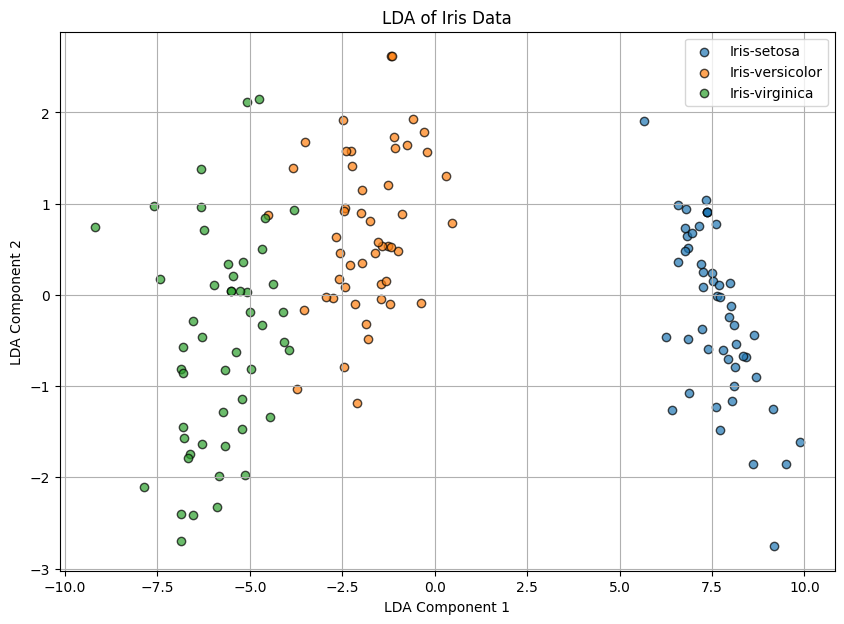

In [ ]:
import matplotlib.pyplot as plt
# Create a scatter plot to visualize the LDA components
plt.figure(figsize=(10, 7))
for species, color in zip(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['red', 'green', 'blue']):
    plt.scatter(
        X_lda[y == species, 0],
        X_lda[y == species, 1],
        label=species,
        alpha=0.7,
        edgecolors='k'
    )

# Add plot labels and title
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Iris Data')
plt.legend()
plt.grid()
plt.show()

###**By manually**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Iris_data.csv')
df = df.drop(columns=['Id'],errors='ignore')

X = df.drop(columns=['Species']).values
y = df['Species'].values

In [ ]:
label_encoder  = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_labels = np.unique(y_encoded)

In [ ]:
# Step1: Calculate the mean vectos for each class
mean_vectors = []
for cls in class_labels:
  mean_vectors.append(np.mean(X[y_encoded == cls],axis=0))

In [ ]:
#Step2: Compute the within-class scatter matrix
S_w = np.zeros((X.shape[1],X.shape[1]))
for cls,mean_vec in zip(class_labels,mean_vectors):
  class_scatter = np.zeros((X.shape[1],X.shape[1]))
  for row in X[y_encoded == cls]:
    row, mean_vec = row.reshape(X.shape[1],1),mean_vec.reshape(X.shape[1],1)
    class_scatter += (row - mean_vec).dot((row - mean_vec).T)
  S_w += class_scatter

In [ ]:
# Step3: Compute the between-class scatter matrix
overall_mean = np.mean(X,axis=0).reshape(X.shape[1],1)
S_b = np.zeros((X.shape[1],X.shape[1]))
for cls,mean_vec in zip(class_labels,mean_vectors):
  n = X[y_encoded == cls].shape[0]
  mean_vec = mean_vec.reshape(X.shape[1],1) # make column vector
  S_b += n*(mean_vec - overall_mean).dot((mean_vec-overall_mean).T)


In [ ]:
# Step4: Compute eigenvalues and eigenvectors for the matrix (S_w^-1 * S_B)
eigen_values,eigen_vectors = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

In [ ]:
# Step 5: Sort eigenvalues and corresponding eigenvectors
eigen_pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs,key=lambda k:k[0],reverse=True)

In [ ]:
# Step 6: Choose the top k eigenvectors (k=2 for 2D visualization)
W = np.hstack((eigen_pairs[0][1].reshape(X.shape[1],1),eigen_pairs[1][1].reshape(X.shape[1],1)))

In [ ]:
# Step 7: Transform the dataset
X_lda = X.dot(W)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'LDA of Iris Data')

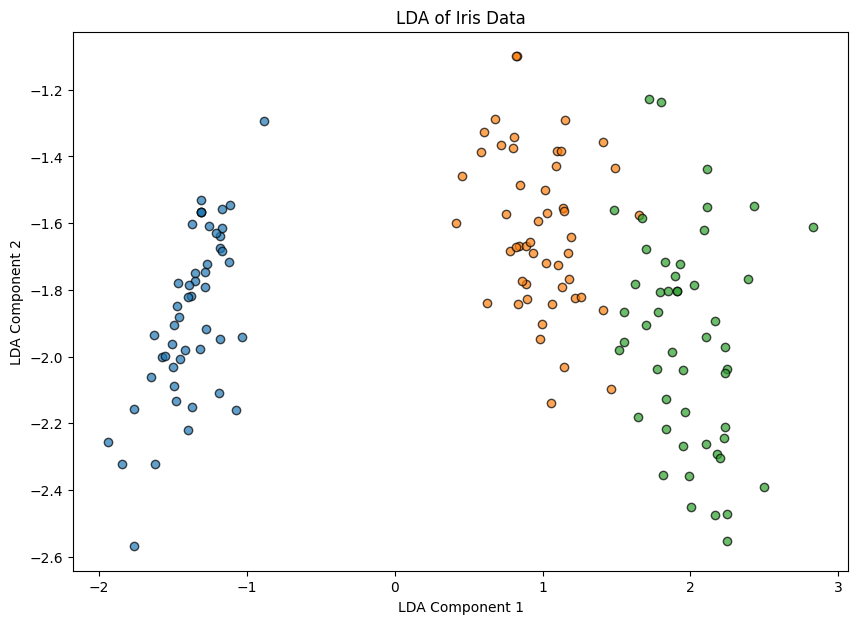

In [ ]:
plt.figure(figsize=(10,7))
for label,color in zip(class_labels,['red','green','blue']):
  plt.scatter(X_lda[y_encoded == label,0],X_lda[y_encoded == label,1],label=label_encoder.inverse_transform([label]),alpha=0.7,edgecolors='k')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Iris Data')

###**Experiment No: 11**
###**Title: DBScan Algorithm**
###**Aim: Implementation of DBScan Algorithm**
###**Theory: About DBScan Algorithm in 300 words**

####Answer: DBScan (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised machine learning algorithm used for clustering data points based on their density. It's particularly effective in identifying clusters of arbitrary shapes and handling datasets with noise and outliers.

####**Working of DBScan**

1. Core Points: DBScan define a core point as a data point that has at least a minimum number of points (minpts) within a specified radius (eps).

2. Border Points: Number of data points within the radius will be less than minpts.

3. Outliers(Noise Points): Points that are not part of any considered noise or outliers.

####**Key Parameters**

* Eps(Epsilon): The radius of the neighborhood to consider.

* Minpts: The minimum number of points required to form a dense region.

####**Advantanges of DBScan**
* Handles arbitrary shapes: Unlike K-Means, DBScan can identify clusters of any shape.

* Robust to noise: It effectively handles outliers by classifying them as noise.

* Doesn't require specifying the number of clusters: The algorithm automatically determines the number of clusters based on the data density.

####**Disadvantages of DBScan**

* Sensitivity to parameter selection: The choice of Eps and Minpts can significantly impact the clustering results.

* Performance on high-dimensional data: DBScan might struggle with high-dimensional data as distance calculations become more complex.

####**Use of DBScan**
* When you have data with clusters of arbitrary shapes.

* When you expect noise or outliers in your data.

* When you don't know the number of clusters beforehand.

####**Applications of DBScan**
* Anomaly detection
* Image segmentation
* Customer segmentation
* Geographical data analysis

###**Platform: Google Colab**
###**Algorithm: Steps--**

* Parameter Definition

   * Epsilon: A distance threshold.
   * Minpts: The minimum number of points required to form a dense region.

* Core Point Identification

 * For each point in the dataset:
 1. Count the number of points within an epsilon-neighborhood.
 2. If the count is greater than or equal to minpts, the point is labeled as a core point.

* Cluster Formation
 * For each unvisted core point:
  1. Create a new cluster.
  2. Perform a depth-first search to identify density-reachable points:
  * Start from the core point.
  * For each neighbor of the current point.
     
     1. If the neighbor is a core point and not yet assigned to a cluster, add it to the current cluster and explore its neighbors recursively.

     2. If the neighbors is not a core point but is within epsilon distance of a core point, assign it to the current cluster.

* Noise Point Identification:
  * Any point that is not assigned to a cluster is considered a noise point.

###**Program**       



####**By library**

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Applying DBScan
dbscan = DBSCAN(eps=0.5,min_samples=5)
df['Clusters'] = dbscan.fit_predict(X_scaled)

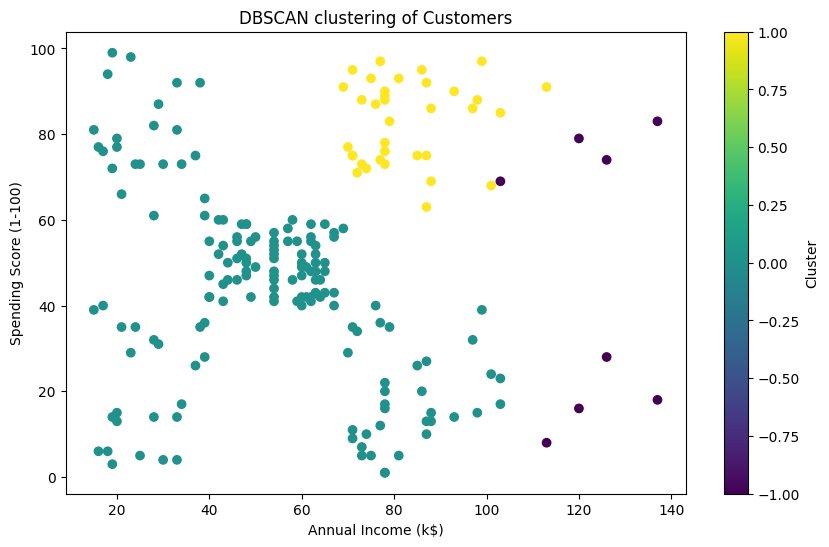

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=df['Clusters'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.title('DBSCAN clustering of Customers')
plt.show()

###**By Manually**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#parameters for DBSCAN
eps=0.5
min_samples=5

In [ ]:
def get_neighbors(X,point_idx,eps):
  neighbors = []
  for i in range(len(X)):
    if np.linalg.norm(X[point_idx] - X[i] < eps):
      neighbors.append(i)
  return neighbors


In [ ]:
#DBSCAN from scratch
def dbscan(X,eps,min_samples):
  labels = [-1] * len(X)
  cluster_id = 0
  for point_idx in range(len(X)):
    if labels[point_idx] != -1:
      continue
    neighbors = get_neighbors(X,point_idx,eps)

    if len(neighbors) < min_samples:
      labels[point_idx] = -1
    else:
      labels[point_idx] = cluster_id
      i = 0
      while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] == -1:
          labels[neighbor_idx] = cluster_id

        elif labels[neighbor_idx] == -1:
          labels[neighbor_idx] = cluster_id
          new_neighbors = get_neighbors(X,neighbor_idx,eps)
          if len(new_neighbors) >= min_samples:
            neighbors.extend(new_neighbors)
        i += 1
      cluster_id += 1
  return labels

In [ ]:
#Apply DBSCAN
labels = dbscan(X_scaled,eps,min_samples)

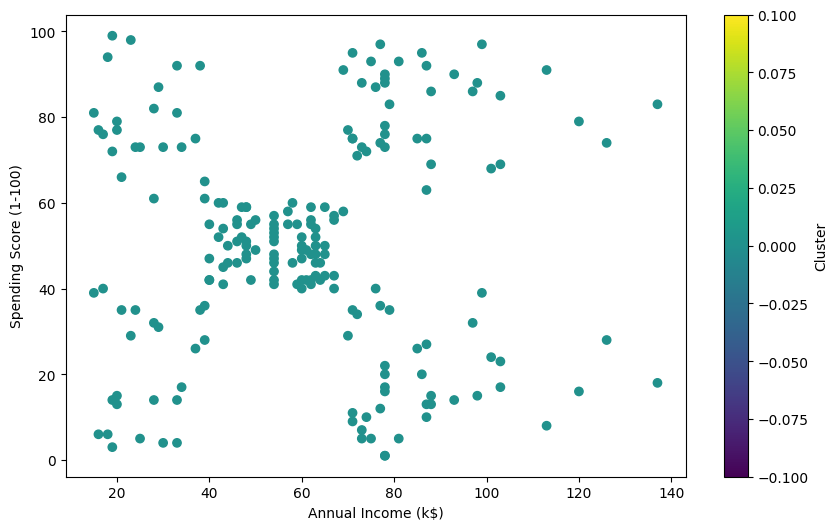

In [ ]:
df['Clusters'] = labels
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=df['Clusters'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

###**Experiment No: 12**
###**Title: Gradient Descent Algorithm**
###**Aim: Implementation of Gradient Descent Algorithm**
###**Theory: About Gradient Descent Algorithm in 300 words**

####Answer:
* Optimization Algorithm: Gradient Descent (GD) is a fundamental optimization algorithm used to train machine learning models.

* Minimizing the Cost function: Its core function is to minimize a cost function (or loss function), which measures the error between a model's predictions and the actual values.

* Iterative rocess: GD works by iteratively adjusting the model's parameters (weights and biases) in the direction that most reduces the cost function.

####**Working of GD**
1. Initialize Parameters: Start with random initial values for the model's parameters.

2. Calculate the Gradient: Compute the gradient of the cost function with respect to each parameter. The gradient indicates the direction of steepest ascent.

3. Update Parameters: Update the parameters by taking a step in the opposite of the gradient. This is done using a learning rate, which controls the size of the steps.

4. Repeat: Repeat steps 2 and 3 until convergence, which means the cost function has reached a minimum (or at leat a local minimum).

####**Variants of Gradient Descent**
* Batch Gradient Descent
* Stochastic Gradient Descent (SGD)
* Mini-Batch Gradient Descent

####**Learning Rate**
* The learning rate determines the size of the steps taken during parameter updates.

* A small learning rate can lead to slow convergence, while a large learning rate can cause the algorithm to overshoot the minimum.

* Choosing the right learning rate is crucial for efficient training.

####**Applications**
* Linear Regression: Finding the best-fitting line for a dataset.
* Logistic Regression: Classifying data into categories.
* Neural Networks: Training deep learning models with multiple layers.

####**Advantages**
* Simple to implement
* Can be used for a wide range of machine learning models
* Can be efficient for large datasets

####**Limitations**
* Can get stuck in local minima
* Can be sensitive to the learning rate
* May not be suitable for all types of optimization problems

###**Platform: Google Colab**
###**Algorithm: Steps--**
* Initialization:

   1. Initialize Parameters
   2. Set Learning Rate

* Iteration:
   1. Calculate the Gradient
   2. Update Parameters

   parameter = parameter - alpha * gradient

   3. Evaluate the cost function
   4. Check for Convergence

####**Program**   
   

####**By library**

In [ ]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df_ = pd.read_csv("/content/insurance.csv")
df_.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df__ = df_[['age','bmi','children','charges']]
X = df__[['age','bmi','children']]
y = df__['charges']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sgd = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
sgd.fit(X_train,y_train)

SGDRegressor(learning_rate='constant')

In [ ]:
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {sgd.coef_}")
print(f"Intercept: {sgd.intercept_}")

Mean Squared Error: 131854854.967289
Coefficients: [3079.43041784 2425.37906223 1128.19583176]
Intercept: [13595.46548797]


####**By Manually**

In [ ]:
import numpy as np
import pandas as pd

d_f = pd.read_csv("/content/insurance.csv")
df4 = d_f[['age','bmi','children','charges']]

In [ ]:
X = df4[['age','bmi','children']].values
y = df4['charges'].values

In [ ]:
# normalize features for better gradient descent performance
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

In [ ]:
# Adding a col. of ones to X for the intercept
X = np.c_[np.ones(X.shape[0]),X]

In [ ]:
theta = np.zeros(X.shape[1]) # initializing theta as  zeros

In [ ]:
alpha = 0.01
num_iterations = 1000

In [ ]:
#Function for gradient descent
def gradient_descent(X,y,theta,alpha,num_iterations):
  m = len(y)
  cost_history = []

  for i in range(num_iterations):
    predictions = X.dot(theta)
    error = predictions - y

    theta -= (alpha/m) * X.T.dot(error)

    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

  return theta,cost_history

In [ ]:
theta_final,cost_history = gradient_descent(X,y,theta,alpha,num_iterations)

In [ ]:
print('Final parameters(theta):',theta_final)
print('Cost History:',cost_history[:10])

Final parameters(theta): [13269.84936446  3370.5264188   2024.39648442   654.20115041]
Cost History: [161323436.79435235, 159376845.9548934, 157469425.68223828, 155600386.7387216, 153768955.8111982, 151974375.18924278, 150215902.44986287, 148492810.14859405, 146804385.51684666, 145149930.16537803]
